### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

We check data and found the missing headers in it.

In [2]:
df=pd.read_csv("auto-mpg.data",na_values='?',comment='\t',sep=' ',skipinitialspace=True)
data=df.copy()
data.head()

,18.0,8,307.0,130.0,3504.,12.0,70,1
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [3]:
cols=['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
data.columns=cols
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


## Problem Statement
    Data contains MPG variable which is continuous data and tells us about the efficiency of fuel consumption of a vehicle.
    Our aim here is to predict the MPG value for a vehicle given we have other attributes.

## EDA
    1) Check for data types of columns
    2) Check for Null values
    3) Check for outliers
    4) Look for category distribution in categorical columns
    5) Plot for correlation
    6) Look for new variables

In [4]:
print(data.info())  # 8 columns, 398 observations
print("-"*60)
print(data.isna().sum()) # Horsepower 6 missing values

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
MPG             397 non-null float64
Cylinders       397 non-null int64
Displacement    397 non-null float64
Horsepower      391 non-null float64
Weight          397 non-null float64
Acceleration    397 non-null float64
Model Year      397 non-null int64
Origin          397 non-null int64
dtypes: float64(5), int64(3)
memory usage: 24.9 KB
None
------------------------------------------------------------
MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,397.000000,397.000000,397.000000,391.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,104.404092,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,38.518732,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


We can observe the statistical measures of numerical column above.

As horsepower column contains missing values we will try to fill it.

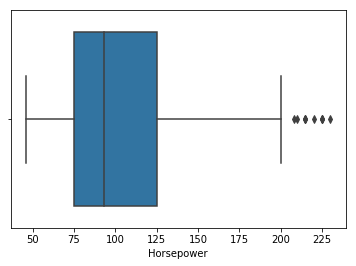

In [5]:
#Study Horsepower column 
sns.boxplot(data['Horsepower'])
plt.show()

### Distribution seems to be left skewed so let's use median as impute method

In [6]:
median=data['Horsepower'].median()
data['Horsepower']=data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
MPG             397 non-null float64
Cylinders       397 non-null int64
Displacement    397 non-null float64
Horsepower      397 non-null float64
Weight          397 non-null float64
Acceleration    397 non-null float64
Model Year      397 non-null int64
Origin          397 non-null int64
dtypes: float64(5), int64(3)
memory usage: 24.9 KB


### Category Distribution
As no column has dtype as object but few columns value are repetitive i.e cylinders and Origin

In [7]:
print(data['Cylinders'].value_counts()/len(data)) # Show Proportion of data in Cylinder
print("-"*40)
print(data['Origin'].value_counts())              # Frequency Count of values in Origin

4    0.513854
8    0.256927
6    0.211587
3    0.010076
5    0.007557
Name: Cylinders, dtype: float64
----------------------------------------
1    248
3     79
2     70
Name: Origin, dtype: int64


#### Origin varable looks like a country code. Let's convert it by mapping it to specific values.

In [8]:
origin_dict={
    1:'India',
    2:'USA',
    3:'Germany'
}
#data['Origin']=data.Origin.replace(origin_dict)
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,15.0,8,350.0,165.0,3693.0,11.5,70,1
1,18.0,8,318.0,150.0,3436.0,11.0,70,1
2,16.0,8,304.0,150.0,3433.0,12.0,70,1
3,17.0,8,302.0,140.0,3449.0,10.5,70,1
4,15.0,8,429.0,198.0,4341.0,10.0,70,1


In [9]:
# Encoding the categorical columns
data=pd.get_dummies(data,prefix='',prefix_sep='')
data.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
392,27.0,4,140.0,86.0,2790.0,15.6,82,1
393,44.0,4,97.0,52.0,2130.0,24.6,82,2
394,32.0,4,135.0,84.0,2295.0,11.6,82,1
395,28.0,4,120.0,79.0,2625.0,18.6,82,1
396,31.0,4,119.0,82.0,2720.0,19.4,82,1


## Correlation
##### We will use pairplots to get an intuition of potential correlations. Pairplot gives you brief overview as how variables relate to each other

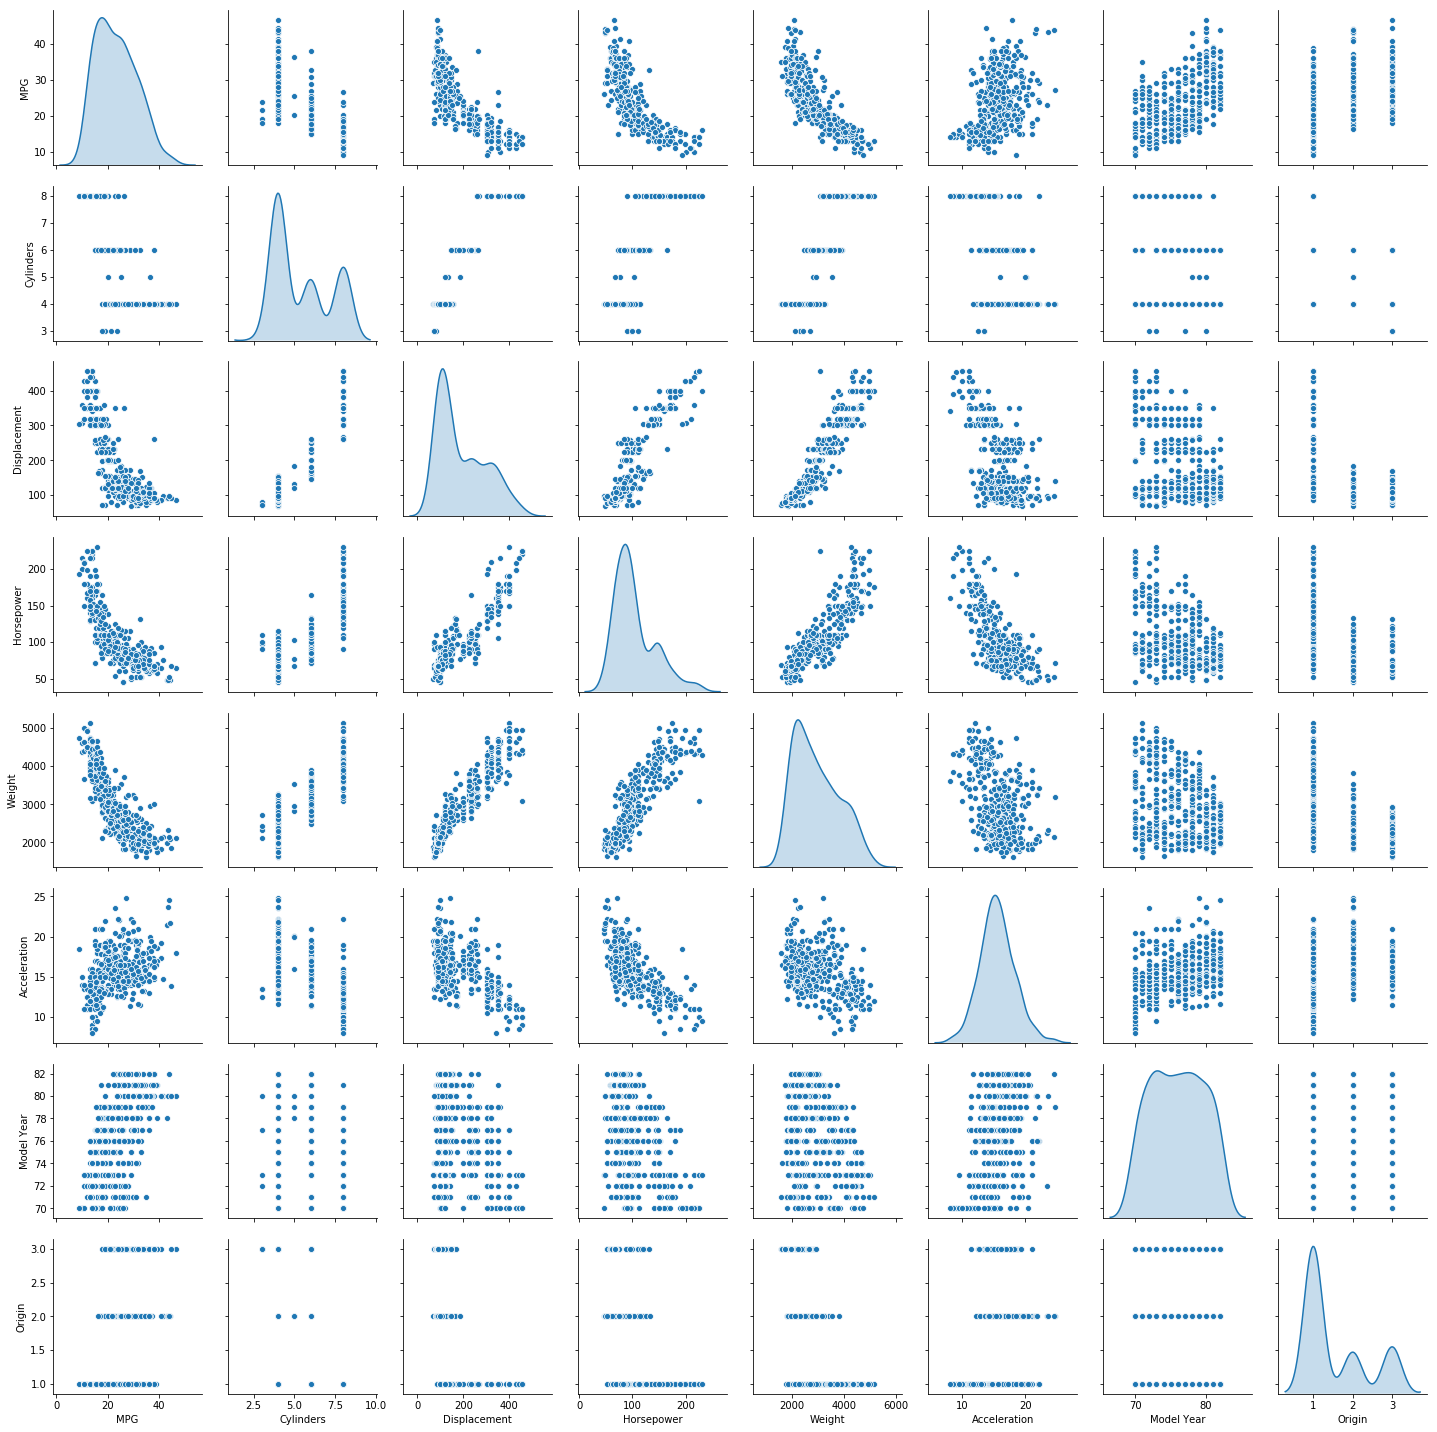

In [10]:
#Coorelation 
sns.pairplot(data,diag_kind='kde')
plt.show()

##### We can see that [Weight, Horsepower,Displacement] has a relation with our target variable. So, we will hypothesize that group of given attributes affect the target variables.

##### Checking Correaltion Matrix with MPG

In [11]:
corr_matrix=data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG             1.000000
Model Year      0.578667
Origin          0.562894
Acceleration    0.419133
Horsepower     -0.773252
Cylinders      -0.775412
Displacement   -0.803972
Weight         -0.831558
Name: MPG, dtype: float64

We saw that [Weight, Horsepower,Displacement,Cylinders] are negatively affecting the target

### Creating new variables:
    1) Displacement on power
    2) Weight on cylinder
    3) Acceleration on power
    4) Acceleration on cylinder

In [12]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_cylinder'] = data['Weight'] / data['Cylinders']
data['acc_power'] = data['Acceleration'] / data['Horsepower']
data['acc_cylinder'] = data['Acceleration'] / data['Cylinders']

corr_matrix= data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                      1.000000
acc_cylinder             0.731933
acc_power                0.703872
Model Year               0.578667
Origin                   0.562894
Acceleration             0.419133
weight_cylinder         -0.023361
displacement_on_power   -0.576501
Horsepower              -0.773252
Cylinders               -0.775412
Displacement            -0.803972
Weight                  -0.831558
Name: MPG, dtype: float64

Here we observe that two new features have strong effect on the target i.e acc_cylinder and acc_power. 
For same reason it is advisable to create new features and check their relationship with target so we can obtain more information about data.